## Phase 2 Project

Final Project Submission
Please fill out:

- Student name: Andrew Levinton
- Student pace: self paced
- Scheduled project review date/time:
- Instructor name: Ahbhineet Kukarni
- Blog post URL:

## Business Problem:
# Stakeholder: Real Estate Agency - Zillow

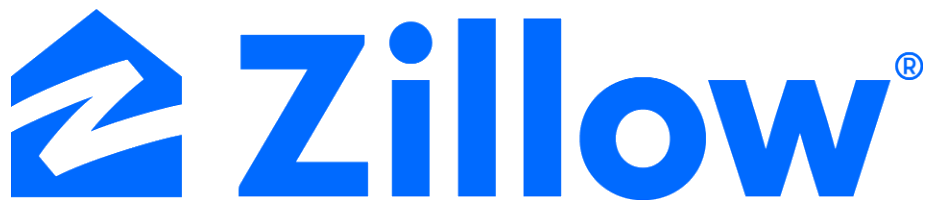

# Problem: 
Business problem - Provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### How problem will be approached

This problem will be approached using information from a built in linear regression model. The model will be built using both numerical and categorical data to provide what features may help to increase the price of peoples homes. Numerical data will be explored and categorical data will be added after in an attempt to improve the model.

### Description of the Data:
King County House Sales dataset
columns can be referred to in readme.

### Target variable
* `price` - Sale price (prediction target)

Possible continuous numerical predictors, based on correlation:

Based on correlation coefficient:
- `sqft_living`- Square footage of living space in the home
- `sqft_above`- Square footage of house apart from basement
- `bathrooms`- Number of bathrooms
- `sqft_patio`- Square footage of outdoor porch or deck space
- `bedrooms` - Number of bedrooms
-`sqft_garage`- Square footage of garage space

Other numerical variables:
- `sqft_lot` - Square footage of the lot
- `sqft_basement` - Square footage of the basement
- `lat` - Latitude coordinate
- `long` - Longitude coordinate

### Simple Linear Regression on select features

These categories are interesting because they are both continuous and integer values that 

Possible string categorical variables:
- `greenbelt`- Whether the house is adjacent to a green belt
- `view`- Quality of view from house
- `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `date` - Date house was sold

Possible numerical categorical variables:
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code

* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each 


* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `floors` - Number of floors (levels) in house

Assumption check:
- `Is it linear?`
- `Is it normal?`
    - histogram
    - QQ-plot
- `Is it homoscedastic?`

### Plan for building stats model:
- Narrow down variables to 3-5 selections(also known as FEATURES)
- One hot encode any categorical variables for plotting purposes
- be prepared to remove certain "dummies" from the dataset to optimize one hot encoding. 

### Process for "narrowing":
- Look at:
    - `Scatter plots`
    - `histograms`
    - `correlation coefficients`
    - `statsmodel p-values to test if the feature is statistically significant`
- Try transforming the data via linear, logarithmic or polynomial transformation to see how shape of data changes. 
- Interactions will be used as a tool for exploring possible relevant correlations between certain features and the the target variable. 

### Variance inflation factor (VIF)

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF = 1 / (1 - R^2)

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

The list of variance inflation factors are calculated for each numerical value below:


#### VIF Data: 

* `price`: 4.32
* `bedrooms`: 24.61
* `bathrooms`: 24.74
* `sqft_living`: 115.26
* `sqft_lot`: 1.14
* `floors`: 15.61
* `sqft_above`: 89.28
* `sqft_basement`: 6.38
* `sqft_garage`: 3.84
* `sqft_patio`: 2.23
* `yr_built`: 1057.3
* `yr_renovated`: 1.1
* `lat`: 2375.3
* `long`: 1099.66
* `month`: 699.65
* `day_of_year`: 614.34

#### VIF levels:

- Good: VIF <= 5

- Moderate/Questionable: VIF >=5 and VIF <= 10

- Throw out: VIF >= 10

#### Good VIFS: 
- `price`: 4.32
- `sqft_lot`: 1.14
- `sqft_garage`: 3.84
- `sqft_patio`: 2.23
- `yr_renovated`: 1.1

#### Questionable VIFS: 
- `sqft_basement`: 6.38

#### Throw out VIFS: 
- `bedrooms`: 24.61
- `bathrooms`: 24.74
- `sqft_living`: 115.26
- `floors`: 15.61
- `sqft_above`: 89.28
- `yr_built`: 1057.3
- `lat`: 2375.3
- `long`: 1099.66
- `month`: 699.65
- `day_of_year`: 614.34

It appears at first glance that the data only yields a small set of independent variables that are not highly collinear with eachother. This will be looked at again after the removal of outliers, and the transformation of data.

# Model #1 - numerical predictors only, some categorical
Predictors:
- `bedrooms`
- `bathrooms`
- `sqft_living`
- `sqft_lot`
- `floors`
- `condition` - redefined to numerical values
- `grade`- redefined to numerical values
- `sqft_above`
- `sqft_basement`
- `sqft_garage`
- `sqft_patio`
- `lat`
- `long`

Target variable:
- `price`


## Observations
p_value > 0.05

- `sqft_lot`
- `month`
- `cond_Fair`
- `cond_Poor`


** look at again after adjusting for outliers


 - All variables with a p_value > 0.05 are deemed statistically insignificant and will eventually be dropped from the final model.
 - With half the condition data(`cond_Fair`, `cond_Poor`) being insignificant in the model, it makes sense to drop the condition data completely. 
 - Month was not anticipated as an effective predictor because it is not typical for the season to affect the sale price of a house.
 
 
Additional Observations:
 - The adjusted r-squared value is .514, indicating that his model can explain approximately 51.4% of the data.
 -  Skew: A kurtosis value between -2 and +2 is good to prove normalcy. The kurtosis value is 10.060, indicating that this model is heavily skewed. This will be addressed through transformations to normalize the data. 

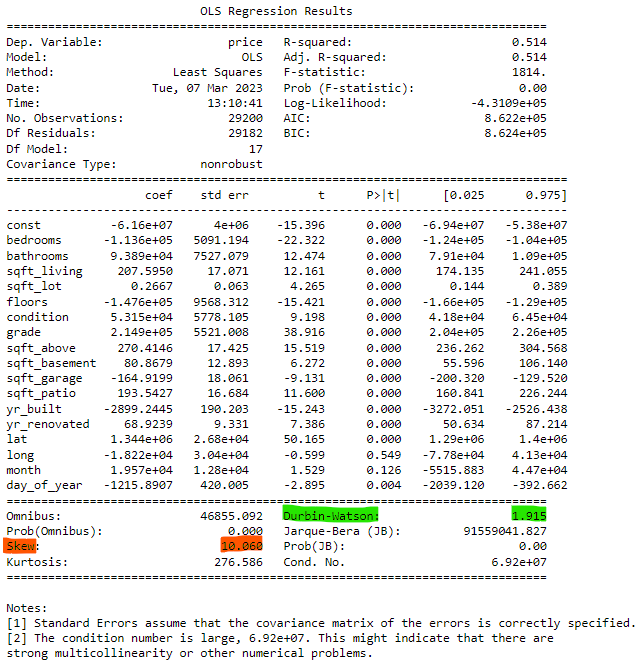

## Possible Improvements to be made to model:
- dropping of variables that are not statistically significant (Pval > 0.05)
- addition of categorial variables(one hot encoded)
- location would possibly be the most interesting variable, mapped against the waterfront or view variable
- transformation of data to satisfy normality assumption -ex: log transformation or square root transformation
- removal of outliers: Outliers in this case will be considered to be any data falling greater than 
  3 standard deviations outside the mean
### Goals
    - improve skewness
    - reduce homoscedacity
    - increase rsquared to promote higher level explanation of data from model

## Possible categorical variables of interest: 

* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `address` - The street address

The grade and condition are already onehotencoded in the model and could be changed to a numerical variable, so this part of the analysis will focus on the string categorical variables. 

The address appears to be the most interesting variable in the batch because it can be mapped against the waterfronts or the quality of view from the houses. For this, we will extrapolate features of the address to reduce and categorize the location. 

## Model #2

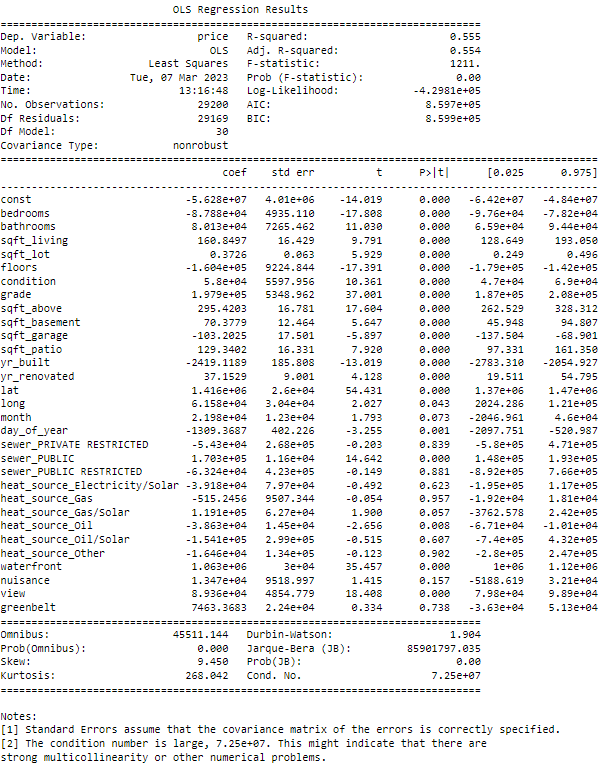

## Observations of Model 2
Predictors:
- 'bedrooms'
- 'bathrooms'
- 'sqft_living'
- 'floors'
- 'grade'
- 'sqft_above',
- 'sqft_basement'
- 'sqft_garage'
- 'sqft_patio'
- 'yr_built',
- 'yr_renovated'
- 'lat'
- 'long'
- 'day_of_year'
- 'waterfront'
- 'nuisance',
- 'view'


pvalue > 0.05
- yr_renovated

All but yr_renovated are statistically significant variables, according to the pvalue.

Categorical variables of waterfront, nuisance, and view were encoded with numbers to see if improvements were made. 

Model is still highly skewed although did present itself with some improvements. Next steps will be to normalize the data by transforming features that are skewed within the data, as well as remove outliers

- Jarque-Bera score is sky high and must come down for the model to hold any validity. 
- Durbin Watson score is in the acceptable range of 1.50-2.50
- Rsquared has 'improved' but only at the expense of the the continued flaws mentioned before. 

## Next Steps
Next steps are to improve numerical variables by:
- removing outliers to improve skew 
- transform variables so they are normally distributed within the model. 
- removing variables that have a pvalue > 0.05

## Model #3

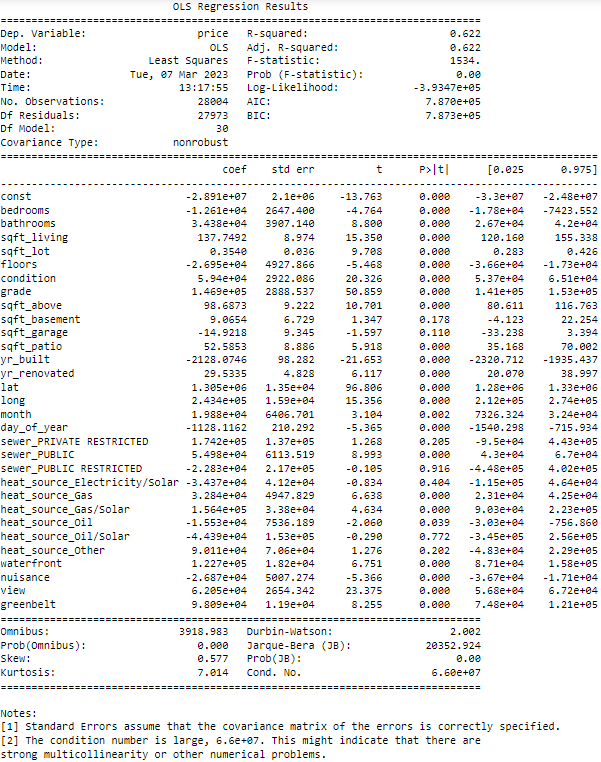

#### Predictors

- `bedrooms`
- `bathrooms` 
- `sqft_living` 
- `sqft_lot 
- `floors`
- `condition` 
- `grade` 
- `sqft_above` 
- `sqft_basement` 
- `sqft_garage`
- `sqft_patio` 
- `yr_built` 
- `yr_renovated` 
- `lat` 
- `long` 
- `month`
- `day_of_year` 
- `sewer_PRIVATE RESTRICTED` 
- `sewer_PUBLIC`
- `sewer_PUBLIC RESTRICTED` 
- `heat_source_Electricity/Solar`
- `heat_source_Gas` 
- `heat_source_Gas/Solar` 
- `heat_source_Oil`
- `heat_source_Oil/Solar` 
- `heat_source_Other` 
- `waterfront` 
- `nuisance`
- `view` 
- `greenbelt`

## Observations of model 3
pvalue > 0.05
- `sqft_basement` 
- `sqft_garage`
- `sewer_PRIVATE RESTRICTED`
- `sewer_PUBLIC RESTRICTED`
- `heat_source_Electricity/Solar`
- `heat_source_Oil/Solar`
- `heat_source_Other`



- Adjusted rsquared indicates that the model explains 62.2% of the data.
- Skewness has improved dramatically to an acceptable range between -2 and 2. The removal of outliers has made this possible.
- Durbin-Watson score is still in the acceptable ranges of 1.5-2.5
- Jarque-Bera score is still very high but has been brought down by a significant factor. Still not perfect but trending in the right direction.
- Multicollinearity is possibly present in the model and likely so given the initial VIFs before the first model was built. VIFS should be revisited again to see if those variables are worth keeping. 